In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/california_housing_train.csv")

In [ ]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f965c4f5be0>,
      dtype=object)

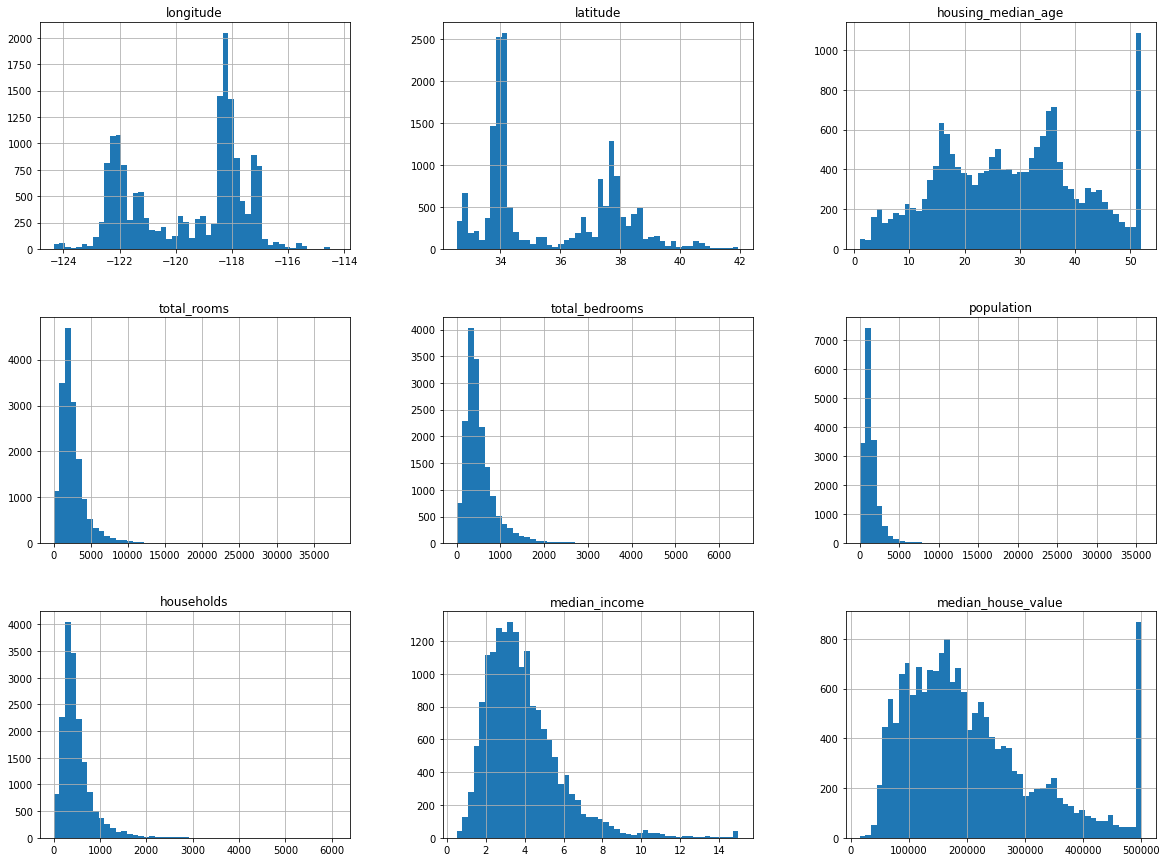

In [ ]:
data.hist(bins=50, figsize=(20,15))

In [ ]:
data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

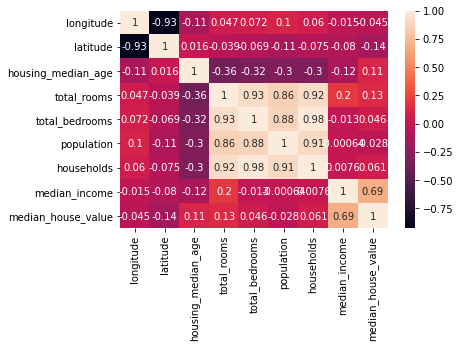

In [ ]:
sns.heatmap(data.corr(), annot=True)

In [ ]:
X = data.drop("median_house_value", axis = 1)
Y = data["median_house_value"].copy()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print("The R-squared value is: {0:0.4f} \n".format(lm.score(X_train, y_train)))

The R-squared value is: 0.6418 



In [ ]:
predicted = lm.predict(X_test)
import numpy as np
mae = np.mean(abs(predicted-y_test))
rmse = np.sqrt(np.mean((predicted-y_test)**2))
rae = np.mean(abs(predicted-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse = np.mean((predicted-y_test)**2)/np.mean((y_test-np.mean(y_test)))
rse = np.mean((predicted-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)


In [ ]:
mae

50389.04998191908

In [ ]:
print("The R-squared value is: {0:0.4f}".format(lm.score(X_test, y_test)))
print("Mean Absolute Error: {0:0.6f}".format(mae))
print("Root Mean Squared Error: {0:0.6f}".format(rmse))
print("Relative Absolute Error: {0:0.6f}".format(rae))
print("Relative Squared Error: {0:0.6f}".format(rse))

The R-squared value is: 0.6398
Mean Absolute Error: 50389.049982
Root Mean Squared Error: 69057.715851
Relative Absolute Error: 0.551683
Relative Squared Error: 0.360222


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

In [ ]:
lm = LinearRegression()
std_scaler = preprocessing.StandardScaler()
scaled = pd.DataFrame(std_scaler.fit_transform(X_train), columns = X_train.columns)

In [ ]:
scaled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,1.332380,-0.638459,-1.390756,-0.701467,-0.800731,-1.014761,-1.058482,0.550659
1,-0.908162,1.390503,0.589818,-0.629485,-0.892599,-0.903028,-0.921695,1.530797
2,-0.629339,-0.144045,-0.994641,0.573967,0.379425,-0.087882,0.355836,-0.723374
3,0.834482,-0.894994,-0.836195,-0.230884,-0.388501,0.029776,-0.245507,0.821022
4,-1.435934,1.008032,1.857386,0.387713,0.596140,0.232081,0.404873,-0.542091


In [ ]:
rfecv = RFECV(estimator=lm, step = 1, cv=5)
rfecv.fit(scaled, y_train)

RFECV(cv=5,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=None, scoring=None, step=1, verbose=0)

In [ ]:
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 8


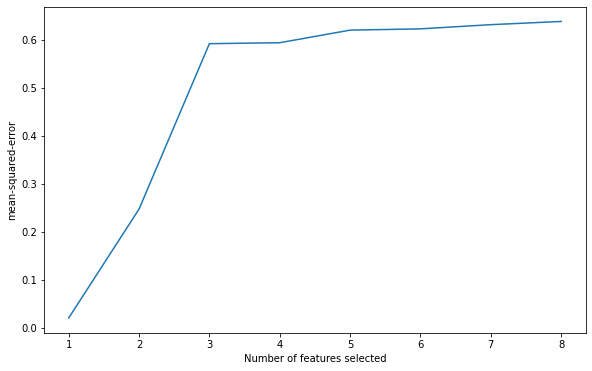

In [ ]:
plt.figure(figsize=(6 * 1.618, 6))
plt.xlabel("Number of features selected")
plt.ylabel("mean-squared-error")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)

In [ ]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
322,-116.88,34.25,11.0,1089.0,198.0,230.0,90.0,4.9643
11968,-121.38,38.60,36.0,1249.0,159.0,362.0,143.0,6.8469
10868,-120.82,35.31,16.0,3924.0,699.0,1325.0,638.0,2.5172
3394,-117.88,33.70,18.0,2135.0,373.0,1464.0,405.0,5.4836
15993,-122.44,37.78,52.0,3510.0,791.0,1703.0,657.0,2.8654


In [ ]:
X_train_new = X_train
lm2 = LinearRegression()
lm2.fit(X_train_new, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
predicted = lm2.predict(X_train_new)

rmse = np.sqrt(np.mean((predicted-y_train)**2))
print("Root Mean Squared Error: {0:0.4f}".format(rmse))

Root Mean Squared Error: 69648.7773


In [ ]:
print("The R-squared value is: {0:0.4f} \n".format(lm2.score(X_train_new, y_train)))

The R-squared value is: 0.6418 



In [ ]:
X_test_part = X_test
predicted = lm2.predict(X_test_part)

In [ ]:
mae = np.mean(abs(predicted-y_test))
rmse = np.sqrt(np.mean((predicted-y_test)**2))
rae = np.mean(abs(predicted-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse = np.mean((predicted-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)
print("The R-squared value is: {0:0.4f} \n".format(lm2.score(X_train_new, y_train)))
print("Mean Absolute Error: {0:0.6f}".format(mae))
print("Root Mean Squared Error: {0:0.6f}".format(rmse))
print("Relative Absolute Error: {0:0.6f}".format(rae))
print("Relative Squared Error: {0:0.6f}".format(rse))

The R-squared value is: 0.6418 

Mean Absolute Error: 50389.049982
Root Mean Squared Error: 69057.715851
Relative Absolute Error: 0.551683
Relative Squared Error: 0.360222


In [ ]:
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from time import time
gbm = GradientBoostingRegressor()
gbm.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import r2_score
print("The R-squared value is: {0:0.4f} \n".format(r2_score(y_train, gbm.predict(X_train))))

The R-squared value is: 0.8006 



In [ ]:
params = {'n_estimators': 1000, 'max_depth': 4, 'min_samples_split': 4,
'learning_rate': 0.01, 'loss': 'ls', 'random_state': 0}
gbm_1 = GradientBoostingRegressor(**params)
gbm_1

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=4,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
gbm_1.fit(X_train, y_train)
print("The R-squared value is: {0:0.4f} \n"
.format(r2_score(y_train, gbm_1.predict(X_train)))) 

The R-squared value is: 0.8377 



In [ ]:
params_2 = {'n_estimators': 10000, 'max_depth': 2,  'min_samples_leaf': 2,
 'min_samples_split': 6,
 'learning_rate': 0.01, 'loss': 'ls'}
gbm_2 = GradientBoostingRegressor(**params_2)
gbm_2.fit(X_train, y_train)
# print the R-squared
from sklearn.metrics import r2_score
print("The R-squared value is: {0:0.4f} \n".
 format(r2_score(y_train,gbm_2.predict(X_train))))

The R-squared value is: 0.8483 



In [ ]:
predicted = gbm_2.predict(X_test)

mae = np.mean(abs(predicted-y_test))
rmse = np.sqrt(np.mean((predicted-y_test)**2))
rae = np.mean(abs(predicted-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse = np.mean((predicted-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)

# print metrics on test data
from sklearn.metrics import r2_score
print("The R-squared value is: {0:0.4f} \n".format(r2_score(y_test,predicted)))
print("Mean Absolute Error: {0:0.6f}".format(mae))
print("Root Mean Squared Error: {0:0.6f}".format(rmse))
print("Relative Absolute Error: {0:0.6f}".format(rae))
print("Relative Squared Error: {0:0.6f}".format(rse))

The R-squared value is: 0.8094 

Mean Absolute Error: 34762.230984
Root Mean Squared Error: 50230.533687
Relative Absolute Error: 0.380593
Relative Squared Error: 0.190582
